# Dummy Model Test
This notebook explores the random guessing rate on our target, iSarcasm, dataset for the F1 metric. Whereas the random guessing rate for accuracy on a binary problem is easily identifiable as .5, F1 is a bit more complicated. We use two methods below, which amount to the same general process. 

## Imports & Settings

First, update working directory to parent so that we may use our custom functions

In [1]:
import os
os.chdir('..')
# os.getcwd( )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_from_disk
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Data

In [3]:
dataset_path = "data/target_iSarcasmEval/itesd_iSarcasmEval_balanced.hf"

In [4]:
datasets = load_from_disk(dataset_path)
datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 4266
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 628
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1400
    })
})

## SKLearn Dummy Classifier
Our first method is to use the SKLearn DummyClassifier. This method takes our data, though it ignores the distribution in favor of a random guessing strategy for predictions. Those predations are then scored against our holdout test set's actual values. The resulting F1 score should be representative of the random guessing rate for our target.

In [5]:
# we will need to view and prep the datasets
# this is more easily done as dataframes
train_df = datasets['train'].to_pandas()
validate_df = datasets['validation'].to_pandas() 
test_df = datasets['test'].to_pandas()

In [6]:
# parse dataset
X_train = train_df['text'].to_list()
y_train = train_df['label'].to_list()

X_test = test_df['text'].to_list()
y_test = test_df['label'].to_list()

In [7]:
f1s = []

# loop through this strategy 5000 times in order to get a mean
for i in range(5000):
    uniform_clf = DummyClassifier(strategy="uniform").fit(X_train, y_train)
    uniform_clf
    y_uniform_pred = uniform_clf.predict(X_test)
    f1 = f1_score(y_test, y_uniform_pred, average='binary')
    f1s.append(f1)
    
f1s_mean = sum(f1s)/len(f1s)

print(f"Uniform F1: {f1s_mean}")

Uniform F1: 0.22194960617294957


## Random Array Method
Our second method uses np.random to uniformly randomly select a binary value for each row in our target array. We then score those predictions against our holdout test set's actual values. The resulting F1 score should be representative of the random guessing rate for our target.

In [8]:
# make a list with 1400 0s and 1's randomly distributed
rand_list = np.random.randint(2, size=1400)
rand_list

array([1, 0, 1, ..., 1, 1, 0])

In [9]:
f1 = f1_score(y_test, rand_list, average='binary')
print(f"Uniform F1: {f1}")

Uniform F1: 0.21493212669683256


In [10]:
f1s = []

# repeat the process 5000 times to get a representative mean
for i in range(5000):
    rand_list = np.random.randint(2, size=1400)
    f1 = f1_score(y_test, rand_list, average='binary')
    f1s.append(f1)
f1s_mean = sum(f1s)/len(f1s)

print(f"Uniform F1: {f1s_mean}")

Uniform F1: 0.22180403887599054


## Conclusion
We find that through both of the above methods we get a random guessing F1 of 0.22. Below, we view a sample confusion matrix from one of our dummy predictions.

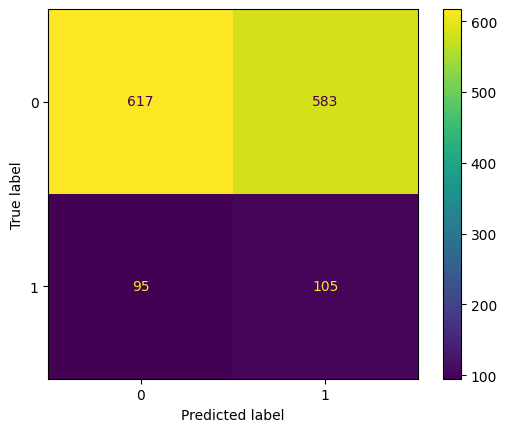

Uniform F1: 0.23648648648648649


In [11]:
# create a confusion matrix with best_preds and true_preds
conf = confusion_matrix(y_test, rand_list)

disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                              display_labels=[0, 1])
disp.plot()

plt.show()

f1 = f1_score(y_test, rand_list, average='binary')
print(f"Uniform F1: {f1}")